# Classify Breast Cancer

### Load Data

notebook by Royhan

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import joblib

In [2]:


df = pd.read_csv("../Data/breast-cancer-wisconsin-data_data.csv")

df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [46]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [48]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [49]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [50]:
df.drop(columns=["Unnamed: 32", "id"], inplace=True)

df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<Axes: >

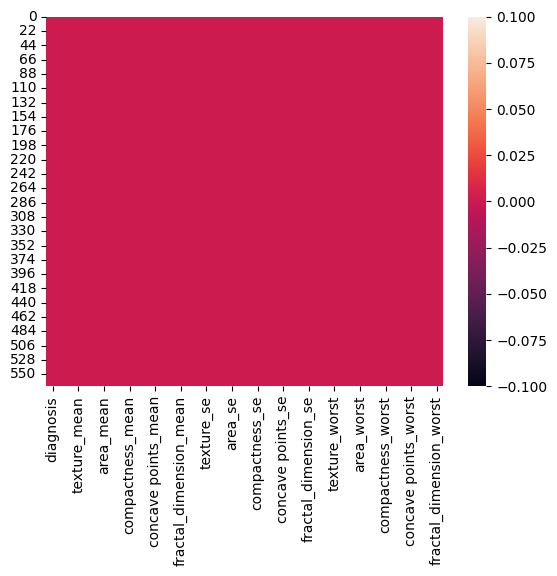

In [51]:
sns.heatmap(df.isnull())

In [52]:
df[df.duplicated()]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [53]:
len(df.columns)

31

In [54]:
df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [55]:
label = {'B':0, 'M':1}

df["diagnosis"] = df["diagnosis"].apply(lambda x: label[x])

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


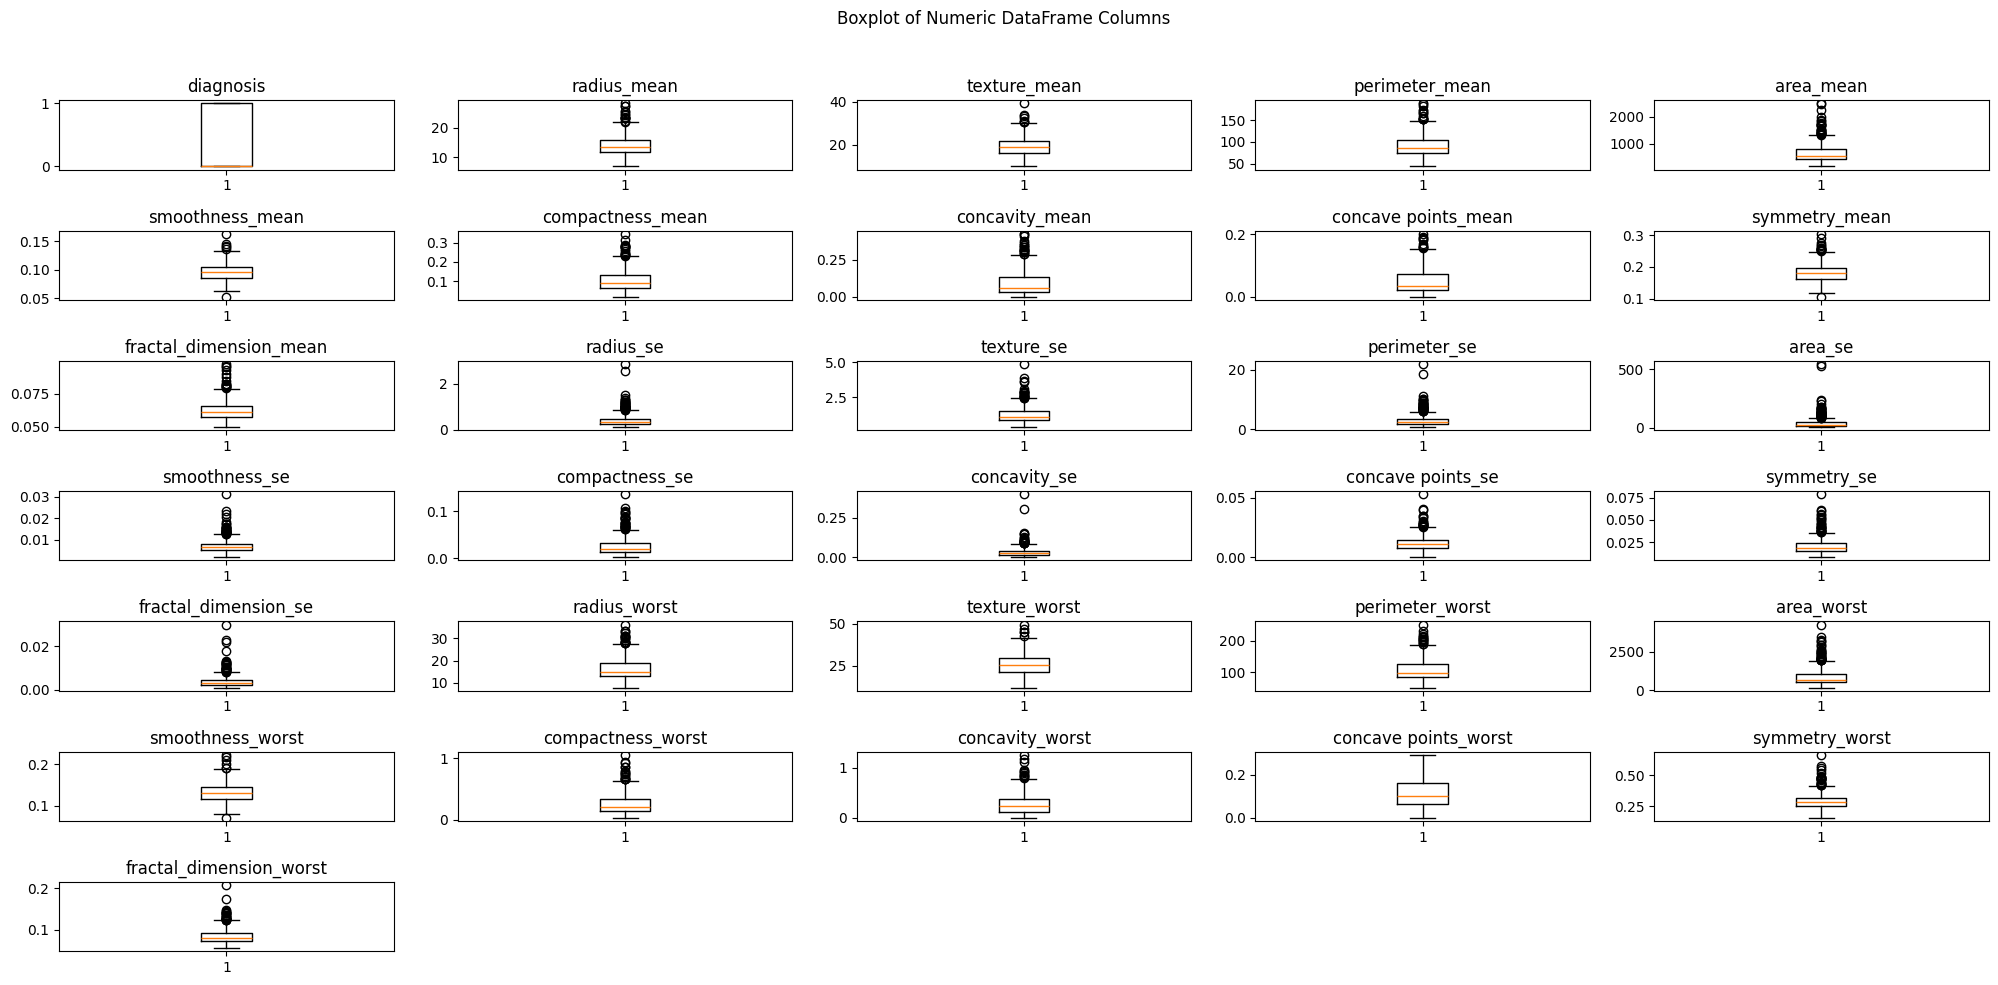

In [56]:
numeric_columns = df.select_dtypes(include='number').columns

# Tentukan ukuran grid subplot berdasarkan jumlah kolom numerik
n_cols = 5
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols  # Perhitungan untuk mengakomodasi semua kolom

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 10))

for i, col in enumerate(numeric_columns):
    row = i // n_cols  
    col_index = i % n_cols  
    axs[row, col_index].boxplot(df[col].dropna())  
    axs[row, col_index].set_title(col)

# Hapus subplot yang tidak terpakai
for j in range(len(numeric_columns), n_rows * n_cols):
    fig.delaxes(axs[j // n_cols, j % n_cols])

plt.suptitle("Boxplot of Numeric DataFrame Columns")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Jumlah outlier yang dihapus: 171


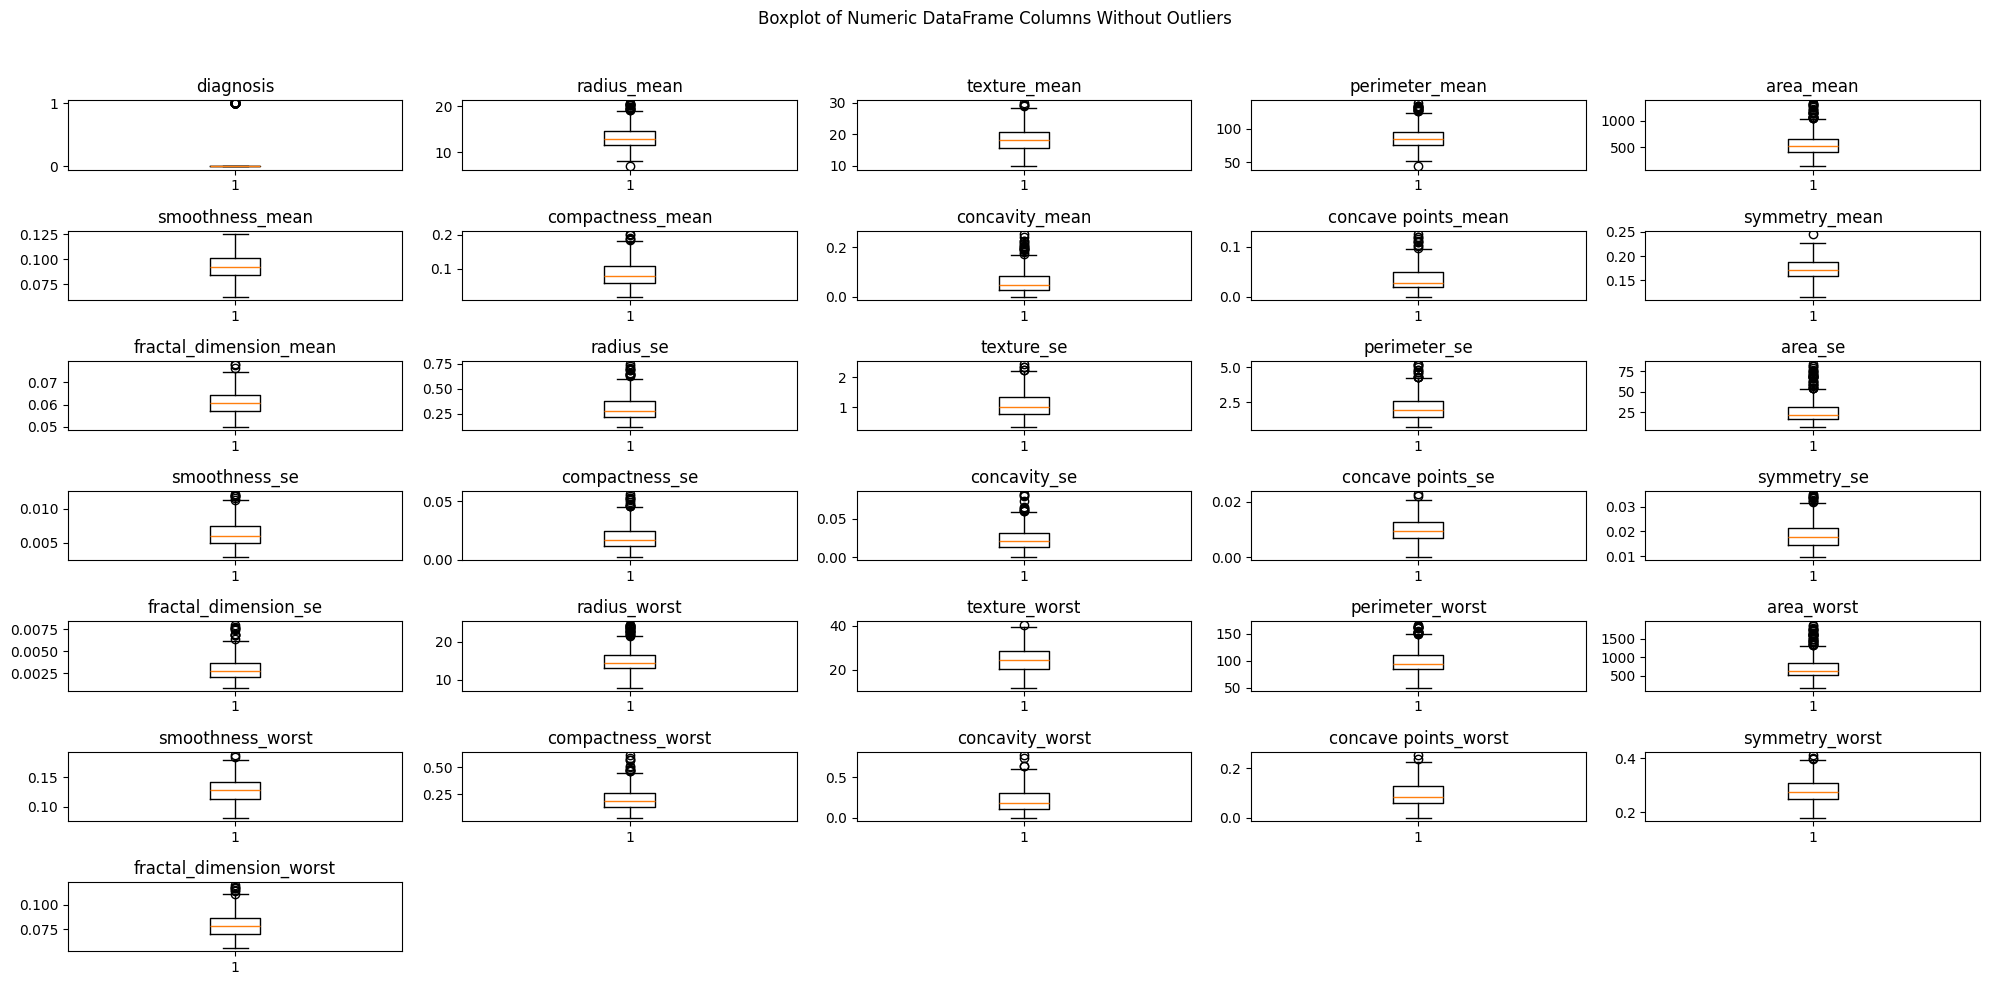

In [57]:
# Fungsi untuk menghilangkan outlier menggunakan IQR
def remove_outliers_iqr(df):
    # Pilih kolom numerik saja
    numeric_df = df.select_dtypes(include=['int64', 'float64'])
    
    # Menghitung kuartil pertama (Q1) dan ketiga (Q3)
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    
    # Rentang interkuartil (IQR)
    IQR = Q3 - Q1
    
    # Menentukan batas bawah dan atas untuk deteksi outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Menandai outlier
    outliers = ((numeric_df < lower_bound) | (numeric_df > upper_bound)).any(axis=1)
    
    # Menghitung jumlah outlier yang dihapus
    num_outliers_removed = outliers.sum()
    print(f"Jumlah outlier yang dihapus: {num_outliers_removed}")
    
    # Menyaring DataFrame berdasarkan baris tanpa outlier
    df_no_outliers = df[~outliers]
    
    return df_no_outliers

# Menghilangkan outlier
new_df = remove_outliers_iqr(df)
numeric_columns = new_df.select_dtypes(include='number').columns

# Plotting boxplot dari data tanpa outlier
fig, axs = plt.subplots((len(numeric_columns) // 5) + 1, 5, figsize=(20, 10))

for i, col in enumerate(numeric_columns):
    row = i // 5  
    col_index = i % 5  
    axs[row, col_index].boxplot(new_df[col].dropna())  
    axs[row, col_index].set_title(col)

for j in range(i + 1, len(axs.flat)):
    fig.delaxes(axs.flat[j])

plt.suptitle("Boxplot of Numeric DataFrame Columns Without Outliers")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [58]:
print(f"amount real data: {len(df)}, amount after outlier data: {len(new_df)}")

amount real data: 569, amount after outlier data: 398


data kategorikal = gender, 

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [60]:
X = df.drop(columns='diagnosis')
y = df['diagnosis']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

X_train

array([[0.34260968, 0.45350017, 0.34952664, ..., 0.60893471, 0.70983639,
        0.58743277],
       [0.54280846, 0.41258032, 0.52802156, ..., 0.47388316, 0.3043564 ,
        0.13813459],
       [0.24747977, 0.1481231 , 0.24179393, ..., 0.31408935, 0.21919968,
        0.21776204],
       ...,
       [0.23990724, 0.43997295, 0.24158662, ..., 0.37525773, 0.12339838,
        0.2521973 ],
       [0.63699181, 0.40818397, 0.62200263, ..., 0.60652921, 0.20579539,
        0.08074249],
       [0.22523546, 0.16841393, 0.22472531, ..., 0.3628866 , 0.20480978,
        0.28696051]])

In [62]:
knn = KNeighborsClassifier()
svm = SVC(random_state=42)
bayesian = GaussianNB()
randomforest = RandomForestClassifier(random_state=42)
desiciontree = DecisionTreeClassifier(random_state=42)

knn.fit(X_train, y_train)
svm.fit(X_train, y_train)
bayesian.fit(X_train, y_train)
randomforest.fit(X_train, y_train)
desiciontree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [63]:
k = 10

print("\nknn model:")
print(np.mean(cross_val_score(knn, X, y, cv=k, scoring='accuracy')))
print("\nsvm model:")
print(np.mean(cross_val_score(svm, X, y, cv=k, scoring='accuracy')))
print("\nnaive bayes model:")
print(np.mean(cross_val_score(bayesian, X, y, cv=k, scoring='accuracy')))
print("\nrandom forest model:")
print(np.mean(cross_val_score(randomforest, X, y, cv=k, scoring='accuracy')))
print("\ndesicion tree model:")
print(np.mean(cross_val_score(desiciontree, X, y, cv=k, scoring='accuracy')))


knn model:
0.9666353383458647

svm model:
0.9771303258145363

naive bayes model:
0.9315162907268169

random forest model:
0.9631578947368421

desicion tree model:
0.9280388471177945


In [64]:
knn_predict = knn.predict(X_test)
svm_predict = svm.predict(X_test)
bayesian_predict = bayesian.predict(X_test)
randomforest_predict = randomforest.predict(X_test)
desiciontree_predict = desiciontree.predict(X_test)

results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

def get_metrics(y_test, y_pred, model_name):
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)

    precision = report["macro avg"]["precision"]
    recall = report["macro avg"]["recall"]
    f1_score = report["macro avg"]["f1-score"]

    results["Model"].append(model_name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1_score)

get_metrics(y_test, knn_predict, "KNN")
get_metrics(y_test, svm_predict, "SVM")
get_metrics(y_test, bayesian_predict, "Naive Bayes")
get_metrics(y_test, randomforest_predict, "Random Forest")
get_metrics(y_test, desiciontree_predict, "Decision Tree")

results_df = pd.DataFrame(results)

results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,KNN,0.982456,0.986667,0.975610,0.980743
1,SVM,0.982456,0.986667,0.975610,0.980743
2,Naive Bayes,0.956140,0.967949,0.939024,0.950976
3,Random Forest,0.991228,0.993243,0.987805,0.990426
4,Decision Tree,0.973684,0.973986,0.968760,0.971277


In [65]:
results_df.Model.to_list()

['KNN', 'SVM', 'Naive Bayes', 'Random Forest', 'Decision Tree']

In [66]:
param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [10, 20, None],     
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],   
    'bootstrap': [True, False]       
}

grid_search = GridSearchCV(estimator=randomforest, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits
Best Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9604347826086957


In [67]:
model = RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100)


model.fit(X_train, y_train)

predict = model.predict(X_test)

print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        73
           1       1.00      0.98      0.99        41

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [ ]:
joblib.dump(model, '../Model/breast_cancer_prediction.pkl')
print("Model Saved in file '../Model/breast_cancer_prediction.pkl'.")

Model Saved in file 'Model/breast_cancer_prediction.pkl'.


In [69]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')